# Earth Satellite Visibility Calculator

Download a JSON formatted database of earth satellite orbits from [CelesTrak](https://celestrak.org/NORAD/elements/) as input.
For groundstation locations you can consult [find-gs](https://www.find-gs.com).

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skyfield.api import EarthSatellite, load

import ipywidgets as widgets
from datetime import datetime, timezone


In [48]:
# Download the latest TLE data as json from https://celestrak.org/NORAD/elements/index.php?FORMAT=json
# and save it to a file
# for this example we will use the TLE data for the Science satellites https://celestrak.org/NORAD/elements/gp.php?GROUP=science&FORMAT=json-pretty
SATS_JSON = 'science-sats.json'

### Browser Satellite Database

In [49]:
with load.open(SATS_JSON) as f:
    data = json.load(f)

ts = load.timescale()
sats = [EarthSatellite.from_omm(ts, fields) for fields in data]
print('Loaded', len(sats), 'satellites')

Loaded 49 satellites


In [50]:

selected_sats = []

pd.DataFrame([sat.name for sat in sats], columns=['Satellite Name'])

,Satellite Name
0,HST
1,POLAR
2,SWAS
3,CXO
4,XMM-NEWTON
5,TERRA
6,CLUSTER II-FM7 (SAMBA)
7,CLUSTER II-FM8 (TANGO)
8,ODIN
9,TIMED


In [47]:
dd_sat_select = widgets.Dropdown(
    options=[s.name for s in sats],
    value=sats[0].name,
    description='Satellite:',
    disabled=False,
)

btn_add = widgets.Button(
    description='Add',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Add satellite from dropdown box to selection',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)

sel_selected_sats = widgets.Select(
    options=selected_sats,
    #value='macOS',
    # rows=10,
    description='Selected satellites:',
    disabled=False
)

def on_btn_add_clicked(btn):
    sat = dd_sat_select.value
    if not sat in selected_sats:
        selected_sats.append(sat)
        sel_selected_sats.options = selected_sats
    print(sat)


btn_del = widgets.Button(
    description='Del',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Delete satellite from selection',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)
def on_btn_del_clicked(btn):
    sat = sel_selected_sats.value
    if sat in selected_sats:
        selected_sats.remove(sat)
        sel_selected_sats.options = selected_sats
        
btn_add.on_click(on_btn_add_clicked)

from IPython.display import Javascript, display
from ipywidgets import widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

btn_run = widgets.Button(description="Run")
btn_run.on_click(run_all)

display(dd_sat_select, btn_add, sel_selected_sats, btn_del, btn_run)

Dropdown(description='Satellite:', options=('HST', 'POLAR', 'SWAS', 'CXO', 'XMM-NEWTON', 'TERRA', 'CLUSTER II-…

Button(description='Add', style=ButtonStyle(), tooltip='Add satellite from dropdown box to selection')

Select(description='Selected satellites:', options=('CRYOSAT 2',), value='CRYOSAT 2')

Button(description='Del', style=ButtonStyle(), tooltip='Delete satellite from selection')

Button(description='Run', style=ButtonStyle())

TIMED


### Configure Simulation

In [36]:
# selected_sats = ['SWARM A', 'SWARM B', 'SWARM C', 'CRYOSAT 2']
selected_sats = ['CRYOSAT 2']

# groundstations = [('KIR1', 67.8558, 20.9608), ('CEB1',40.4527, -4.3675), ('NNO1',-31.0482, 116.1915)]
groundstations  = [('SVA', 78.2306, 15.4078), ('TRO',-72.0124, 2.5350)]
START_DATE = datetime(2024, 1, 1, 0, 0, 0, tzinfo=timezone.utc)
MIN_ELEVATION = 10
DURATION_H = 24*7
STEPS_PER_HOUR = 60
MIN_CONTACT_DURATION = 300 # seconds

In [37]:

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import math as m

from skyfield.api import load, EarthSatellite
from mpl_toolkits.mplot3d import Axes3D

# import matplotlib_inline


%matplotlib widget

planets = load('de421.bsp')
earth = planets['Earth']


In [38]:
sats_data = []
for s in selected_sats:
    for ss in sats:
        if ss.name == s:
            #print(ss.model)
            sats_data.append(ss)




In [39]:
from datetime import datetime, timedelta, timezone

def generate_datetimes(start_datetime, hours, steps_per_hour):
    """
    Generates a list of datetime objects for a given number of hours and steps per hour.

    Args:
        start_datetime: A datetime object representing the start time.
        hours: The total number of hours.
        steps_per_hour: The number of datetime objects to generate per hour.

    Returns:
        A list of datetime objects.
    """
    datetimes = []
    time_delta = timedelta(hours=1 / steps_per_hour)

    for i in range(hours * steps_per_hour):
        datetimes.append(start_datetime + i * time_delta)

    return datetimes
    
def plot_satellite_3d(satellite, ts, duration_hours=12, steps_per_hour=60):
    """
    Plots the 3D orbit of an EarthSatellite using matplotlib.

    Args:
        satellite: A Skyfield EarthSatellite object.
        ts: A Skyfield timescale object.
        duration_hours: The duration of the orbit to plot, in hours.
        steps_per_hour: The number of time steps per hour.
    """
    try:
        start_datetime = datetime(2023, 1, 1, 0, 0, 0, tzinfo=timezone.utc)
        times = generate_datetimes(start_datetime, duration_hours, steps_per_hour)
        times = ts.from_datetimes(times)
        #times = ts.utc(2023, 1, 1, range(duration_hours), range(0, 60, 60 // steps_per_hour))
        geocentric = satellite.at(times)
        x, y, z = geocentric.position.km

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.plot(x, y, z)
        ax.set_xlabel('X (km)')
        ax.set_ylabel('Y (km)')
        ax.set_zlabel('Z (km)')
        ax.set_title(f'3D Orbit of {satellite.name}')

        # Plot Earth (approximate)
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        earth_radius = 6371  # Approximate Earth radius in km
        earth_x = earth_radius * np.cos(u) * np.sin(v)
        earth_y = earth_radius * np.sin(u) * np.sin(v)
        earth_z = earth_radius * np.cos(v)
        ax.plot_surface(earth_x, earth_y, earth_z, color='blue', alpha=0.3)

        plt.show()

    except Exception as e:
        print(f"Error plotting satellite orbit: {e}")

from skyfield.api import N,S,E,W, wgs84

def plot_satellites_3d(sats, ts, duration_hours=12, steps_per_hour=60):
    """
    Plots the 3D orbit of an EarthSatellite using matplotlib.

    Args:
        satellite: A Skyfield EarthSatellite object.
        ts: A Skyfield timescale object.
        duration_hours: The duration of the orbit to plot, in hours.
        steps_per_hour: The number of time steps per hour.
    """
    try:
        global groundstations
        global START_DATE

        start_datetime = START_DATE
        times = generate_datetimes(start_datetime, duration_hours, steps_per_hour)
        times = ts.from_datetimes(times)
        #times = ts.utc(2023, 1, 1, range(duration_hours), range(0, 60, 60 // steps_per_hour))
        

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlabel('X (km)')
        ax.set_ylabel('Y (km)')
        ax.set_zlabel('Z (km)')

        for gs in groundstations:
            poi = wgs84.latlon(gs[1], gs[2])
            x, y, z = poi.at(ts.utc(START_DATE)).position.km
            # calculate x, y, z at start_datetime
            print(x, y, z)
            ax.plot(x, y, z, 'bo', color='red', label=gs[0])
        

        for satellite in sats:
            geocentric = satellite.at(times)
            x, y, z = geocentric.position.km
            ax.plot(x, y, z, label=satellite.name)
            
            
        # ax.set_title(f'3D Orbit of {satellite.name}')

        # Plot Earth (approximate)
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        earth_radius = 6371  # Approximate Earth radius in km
        earth_x = earth_radius * np.cos(u) * np.sin(v)
        earth_y = earth_radius * np.sin(u) * np.sin(v)
        earth_z = earth_radius * np.cos(v)
        ax.plot_surface(earth_x, earth_y, earth_z, color='blue', alpha=0.3)
        
        ax.legend()
        
        plt.show()

    except Exception as e:
        print(f"Error plotting satellite orbit: {e}")


### Orbit Visualization

-542.3563864070865 1180.6368257067684 6223.475697942538
-437.60033560083195 1929.4923783946338 -6043.177479654414


/var/folders/r9/6wtxl4cx6wv52dp28vj3_xxr0000gn/T/ipykernel_1546/833240387.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, z, 'bo', color='red', label=gs[0])


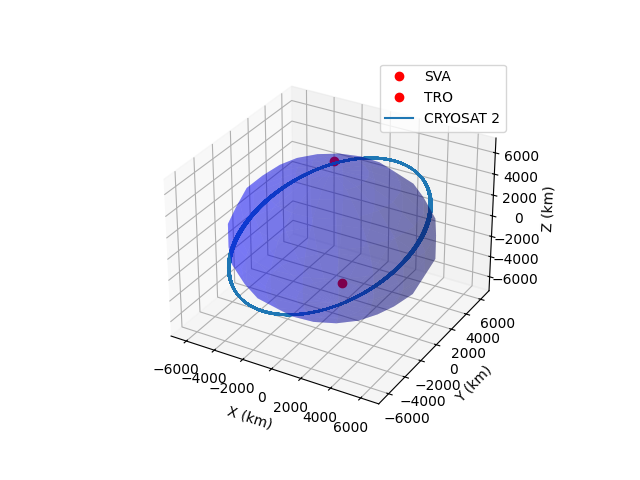

In [40]:
plot_satellites_3d(sats_data, ts, duration_hours=DURATION_H, steps_per_hour=STEPS_PER_HOUR)

In [51]:
def calc_visibility(sat, gs, duration_hours=12, steps_per_hour=3600, min_elevation=30):
    """
    Calculate the visibility of a satellite from a ground station.

    Args:
        sat: A Skyfield EarthSatellite object.
        gs: A tuple containing the name, latitude, and longitude of the ground station.
        duration_hours: The duration of the orbit to calculate, in hours.
        steps_per_hour: The number of time steps per hour.

    Returns:
        A list of tuples containing the datetime and elevation angle of the satellite as seen from the ground station.
    """
    try:
        global START_DATE
        start_datetime = START_DATE
        times = generate_datetimes(start_datetime, duration_hours, steps_per_hour)
        times = ts.from_datetimes(times)
        #times = ts.utc(2023, 1, 1, range(duration_hours), range(0, 60, 60 // steps_per_hour))
        #geocentric = sat.at(times)

        poi = wgs84.latlon(gs[1], gs[2])

        difference = sat - poi

        topocentric = difference.at(times)
        alt, az, distance = topocentric.altaz()
        
        visibility = [(t.utc_datetime(), a) for t, a in zip(times, alt.degrees)]
        # filter visibility to only include times when the satellite is above the horizon
        visibility = [(t, a) for t, a in visibility if a > min_elevation]
        # group visibility by continuous time intervals in the form of (sat,gs, start_time, end_time)
        
        visi_ranges = []
        if len(visibility) == 0:
            return visi_ranges
        start_time = visibility[0][0]
        end_time = visibility[0][0]
        for i in range(1, len(visibility)):
            visi_duration = (visibility[i][0] - visibility[i-1][0]).total_seconds()
            if visi_duration > 60:
                # calculate oneway light time delay
                owl_delay = float(distance.km[0] / 299792.458)
                visi_ranges.append((sat.name, gs[0], start_time, end_time, owl_delay))
                start_time = visibility[i][0]
            end_time = visibility[i][0]
        #visi_ranges.append((sat.name, gs[0], start_time, end_time, visi_duration))

        return visi_ranges
    except Exception as e:
        print(f"Error calculating visibility: {e}")
        return []

all_visibilities = []
for sat in sats_data:
    for gs in groundstations:
        visibilities = calc_visibility(sat, gs, duration_hours=DURATION_H, steps_per_hour=STEPS_PER_HOUR, min_elevation=5)
        all_visibilities.extend(visibilities)

for i in range(len(all_visibilities)):
    all_visibilities[i] = (all_visibilities[i][0], all_visibilities[i][1], (all_visibilities[i][2] - START_DATE).total_seconds(), (all_visibilities[i][3] - START_DATE).total_seconds(), all_visibilities[i][4])

# filter out entries with a duration of less than MIN_CONTACT_DURATION
all_visibilities = [v for v in all_visibilities if (v[3] - v[2]) > MIN_CONTACT_DURATION]

### Visibilty Statistics

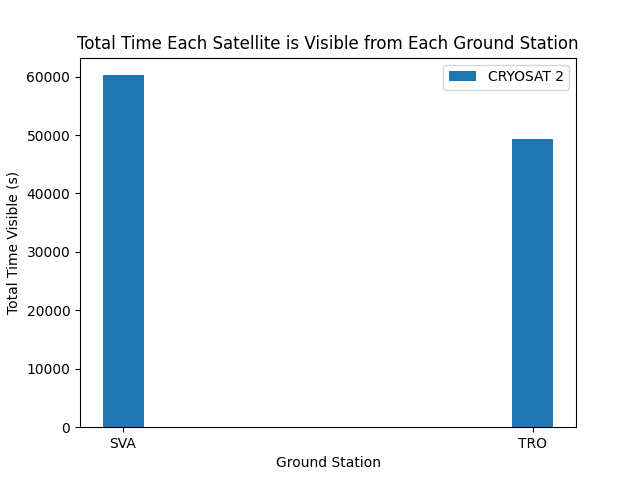

In [52]:
# plot statistics about ground station usage and satellite visibility
from collections import defaultdict

def plot_visibility_stats(visibilities):
    """
    Plot statistics about ground station usage and satellite visibility.

    Args:
        visibilities: A list of tuples containing the satellite name, ground station name, start time, end time, and one-way light time delay.
    """
    try:
        # Calculate the total time each satellite is visible from each ground station
        sat_gs_times = defaultdict(lambda: defaultdict(int))
        for vis in visibilities:
            sat, gs, start_time, end_time, owl_delay = vis
            sat_gs_times[sat][gs] += end_time - start_time

        # Plot the total time each satellite is visible from each ground station
        fig, ax = plt.subplots()
        bar_width = 0.10
        index = np.arange(len(groundstations))

        for i, (sat, gs_times) in enumerate(sat_gs_times.items()):
            gs_durations = [gs_times.get(gs[0], 0) for gs in groundstations]
            ax.bar(index + i * bar_width, gs_durations, bar_width, label=sat)

        ax.set_xticks(index + bar_width * (len(sat_gs_times) - 1) / 2)
        ax.set_xticklabels([gs[0] for gs in groundstations])

        ax.set_xlabel('Ground Station')
        ax.set_ylabel('Total Time Visible (s)')
        ax.set_title('Total Time Each Satellite is Visible from Each Ground Station')
        ax.legend()
        plt.show()

    except Exception as e:
        print(f"Error plotting visibility statistics: {e}")

plot_visibility_stats(all_visibilities)


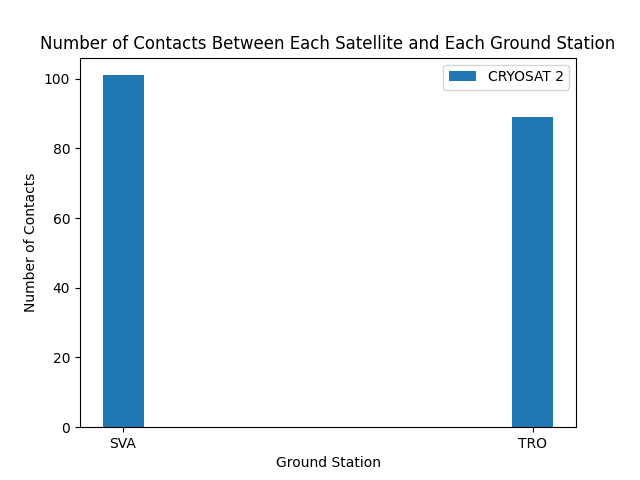

In [53]:
# plot total number of contacts per satellite, per ground station

def plot_contact_stats(visibilities):
    """
    Plot statistics about the number of contacts between satellites and ground stations.

    Args:
        visibilities: A list of tuples containing the satellite name, ground station name, start time, end time, and one-way light time delay.
    """
    try:
        # Calculate the total number of contacts between each satellite and each ground station
        sat_gs_contacts = defaultdict(lambda: defaultdict(int))
        for vis in visibilities:
            sat, gs, start_time, end_time, owl_delay = vis
            sat_gs_contacts[sat][gs] += 1

        # Plot the total number of contacts between each satellite and each ground station
        fig, ax = plt.subplots()
        bar_width = 0.1
        index = np.arange(len(groundstations))

        for i, (sat, gs_contacts) in enumerate(sat_gs_contacts.items()):
            gs_counts = [gs_contacts.get(gs[0], 0) for gs in groundstations]
            ax.bar(index + i * bar_width, gs_counts, bar_width, label=sat)

        ax.set_xticks(index + bar_width * (len(sat_gs_contacts) - 1) / 2)
        ax.set_xticklabels([gs[0] for gs in groundstations])

        ax.set_xlabel('Ground Station')
        ax.set_ylabel('Number of Contacts')
        ax.set_title('Number of Contacts Between Each Satellite and Each Ground Station')
        ax.legend()
        plt.show()

    except Exception as e:
        print(f"Error plotting contact statistics: {e}")

plot_contact_stats(all_visibilities)

In [54]:
all_visibilities.sort(key=lambda x: x[2])



pd.DataFrame(all_visibilities, columns=['Satellite', 'Ground Station', 'Start Time (s)', 'End Time (s)', 'One-Way Light Time Delay (s)'])


,Satellite,Ground Station,Start Time (s),End Time (s),One-Way Light Time Delay (s)
0,CRYOSAT 2,SVA,120.0,660.0,0.010036
1,CRYOSAT 2,TRO,3360.0,3900.0,0.041641
2,CRYOSAT 2,SVA,6180.0,6660.0,0.010036
3,CRYOSAT 2,TRO,9240.0,9660.0,0.041641
4,CRYOSAT 2,SVA,12180.0,12720.0,0.010036
...,...,...,...,...,...
185,CRYOSAT 2,SVA,583560.0,584160.0,0.010036
186,CRYOSAT 2,TRO,586980.0,587580.0,0.041641
187,CRYOSAT 2,SVA,589440.0,590100.0,0.010036
188,CRYOSAT 2,TRO,592920.0,593580.0,0.041641


In [55]:
# replace all whitespace with underscore in satellite names
for i in range(len(all_visibilities)):
    all_visibilities[i] = (all_visibilities[i][0].replace(" ", "_"), all_visibilities[i][1], all_visibilities[i][2], all_visibilities[i][3], all_visibilities[i][4])

# print as CSV
print(f"node1,node2,start_time,end_time,light_time_delay # simulation start time : {START_DATE} | min elevation : {MIN_ELEVATION} | duration : {DURATION_H} hours | steps per hour : {STEPS_PER_HOUR} | min contact duration : {MIN_CONTACT_DURATION} seconds")
for vis in all_visibilities:
    print(f"{vis[0]},{vis[1]},{vis[2]},{vis[3]},{vis[4]:.6f}")
    print(f"{vis[1]},{vis[0]},{vis[2]},{vis[3]},{vis[4]:.6f}")

node1,node2,start_time,end_time,light_time_delay # simulation start time : 2024-01-01 00:00:00+00:00 | min elevation : 10 | duration : 168 hours | steps per hour : 60 | min contact duration : 300 seconds
CRYOSAT_2,SVA,120.0,660.0,0.010036
SVA,CRYOSAT_2,120.0,660.0,0.010036
CRYOSAT_2,TRO,3360.0,3900.0,0.041641
TRO,CRYOSAT_2,3360.0,3900.0,0.041641
CRYOSAT_2,SVA,6180.0,6660.0,0.010036
SVA,CRYOSAT_2,6180.0,6660.0,0.010036
CRYOSAT_2,TRO,9240.0,9660.0,0.041641
TRO,CRYOSAT_2,9240.0,9660.0,0.041641
CRYOSAT_2,SVA,12180.0,12720.0,0.010036
SVA,CRYOSAT_2,12180.0,12720.0,0.010036
CRYOSAT_2,TRO,15060.0,15540.0,0.041641
TRO,CRYOSAT_2,15060.0,15540.0,0.041641
CRYOSAT_2,SVA,18180.0,18780.0,0.010036
SVA,CRYOSAT_2,18180.0,18780.0,0.010036
CRYOSAT_2,TRO,20880.0,21420.0,0.041641
TRO,CRYOSAT_2,20880.0,21420.0,0.041641
CRYOSAT_2,SVA,24180.0,24780.0,0.010036
SVA,CRYOSAT_2,24180.0,24780.0,0.010036
CRYOSAT_2,TRO,26700.0,27300.0,0.041641
TRO,CRYOSAT_2,26700.0,27300.0,0.041641
CRYOSAT_2,SVA,30120.0,30780.0,0.0100